In [1]:
import pandas as pd
from pycaret.classification import *

In [7]:
file = pd.read_csv('./data_with_anomalies.csv')

In [26]:
file.head()

,course_id,user_id_x,BUILD_ERROR,FAILURE,TIME_OUT,RUNTIME_ERROR,SUCCESS,courses_per_semester,Ingeniería Civil,Ingeniería Electricista,...,Licenciatura en Sistemas,75.01-95.01,75.06,75.40,75.40-95.40,75.41,75.41-95.41,LABI,Anomaly,Anomaly_Score
0,6,161,33,26,2,0,41,1,0,0,...,0,0,0,1,0,0,0,0,0,26.041700
1,6,186,26,20,4,0,34,1,0,0,...,0,0,0,1,0,0,0,0,0,3.713378
2,6,186,26,20,4,0,34,1,0,0,...,0,0,0,1,0,0,0,0,0,3.713378
3,6,186,26,20,4,0,34,1,0,0,...,0,0,0,0,1,0,0,0,0,5.214687
4,6,186,26,20,4,0,34,1,0,0,...,0,0,0,0,0,1,0,0,0,4.947358


In [28]:
file.drop(["Anomaly_Score"],inplace=True,axis=1)

In [29]:
data = file.sample(frac=0.95, random_state=786)
data_unseen = file.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1296, 26)
Unseen Data For Predictions: (68, 26)


In [31]:
exp_clf101 = setup(data = data, ignore_features = ['course_id', 'user_id_x'], target = 'Anomaly', session_id=123) 

,Description,Value
0,session_id,123
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1296, 26)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9978,0.9739,0.9500,0.9667,0.9467,0.9456,0.9515,0.0250
gbc,Gradient Boosting Classifier,0.9967,0.9458,0.9167,0.9667,0.9267,0.9251,0.9327,0.0150
xgboost,Extreme Gradient Boosting,0.9967,0.9744,0.9167,0.9667,0.9267,0.9251,0.9327,0.0230
catboost,CatBoost Classifier,0.9967,0.9994,0.9167,0.9667,0.9267,0.9251,0.9327,0.3020
dt,Decision Tree Classifier,0.9956,0.9411,0.8833,0.9667,0.9067,0.9045,0.9139,0.0040
ada,Ada Boost Classifier,0.9945,0.9939,0.8833,0.9333,0.8933,0.8906,0.8982,0.0150
lightgbm,Light Gradient Boosting Machine,0.9934,0.9508,0.8833,0.9000,0.8733,0.8701,0.8794,0.0560
lda,Linear Discriminant Analysis,0.9923,0.9486,0.9500,0.8250,0.8590,0.8553,0.8699,0.0040
et,Extra Trees Classifier,0.9923,0.9727,0.7500,0.9667,0.8100,0.8066,0.8304,0.0220
ridge,Ridge Classifier,0.9879,0.0000,0.6333,0.8500,0.6967,0.6928,0.7145,0.0030


In [33]:
print(best_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


In [34]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [36]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9889,1.0000,1.0000,0.6667,0.8000,0.7945,0.8118
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9889,0.7386,0.5000,1.0000,0.6667,0.6617,0.7031


In [37]:
tuned_rf = tune_model(rf)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9889,0.9943,1.0000,0.6667,0.8000,0.7945,0.8118
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.9889,0.7500,0.5000,1.0000,0.6667,0.6617,0.7031


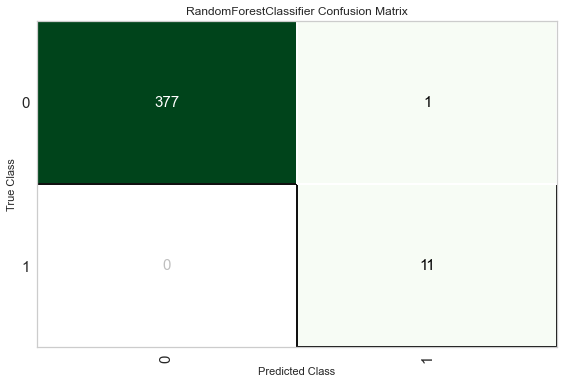

In [41]:
plot_model(tuned_rf, plot = 'confusion_matrix')

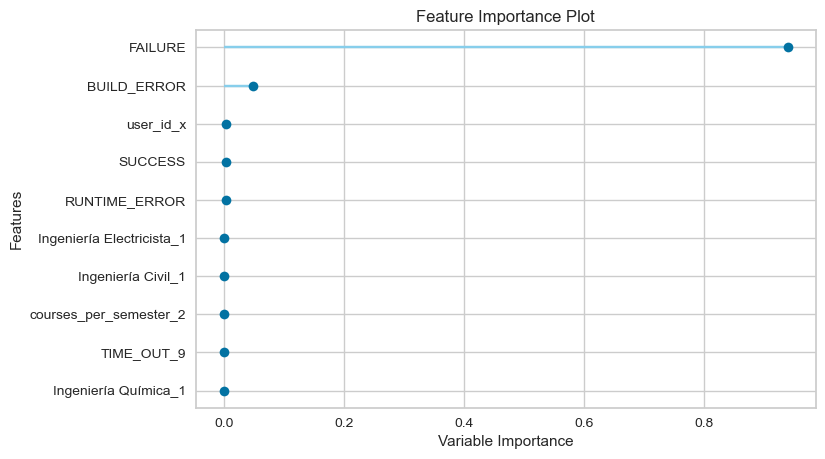

In [40]:
plot_model(tuned_rf, plot='feature')

In [45]:
unseen_predictions = predict_model(tuned_rf, data=data_unseen)

In [46]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['Anomaly'], unseen_predictions['Label'], metric = 'Accuracy')

1.0